In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv('all_exp_df.csv')
df = df.drop(columns=[c for c in df.columns if 'Unnamed' in c])
df

,test_classifier_fit_time,test_feature_selector_fit_time,test_acc,test_mcc,test_roc_auc,test_pr_auc,test_mean_inference_time,dataset,n_samples,n_features_org,cv_method,learning_algorithm,filtering_algorithm,n_selected_features,selected_features_names,selected_features_scores
0,0.001552,0.014603,0.930556,0.848620,0.952340,0.958263,0.000714,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,1,1881,216.7237
1,0.001559,0.015855,0.958333,0.907651,0.994043,0.989402,0.000695,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,2,"1881,2287","216.7237,198.9983"
2,0.001659,0.017396,0.930556,0.848620,0.993191,0.988151,0.000736,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,3,"1881,2287,3251","216.7237,198.9983,185.3939"
3,0.001565,0.013124,0.958333,0.907651,0.993191,0.988151,0.000700,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,4,"1881,2287,3251,1833","216.7237,198.9983,185.3939,174.7985"
4,0.001660,0.014022,0.944444,0.877447,0.994894,0.990794,0.000736,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,5,"1881,2287,3251,1833,4846","216.7237,198.9983,185.3939,174.7985,155.4472"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78584,0.139613,703.013036,0.900000,0.816497,0.840000,0.776667,0.072681,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,11857,7538","1.0000,0.9999,0.9998"
78585,0.128810,813.998643,0.900000,0.816497,1.000000,1.000000,0.062646,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,7622,10233","1.0000,0.9999,0.9998"
78586,0.158858,646.426888,0.900000,0.816497,1.000000,1.000000,0.071802,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,10671,10233","1.0000,0.9999,0.9998"
78587,0.118865,821.549181,1.000000,1.000000,1.000000,1.000000,0.058886,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,7622,9092","1.0000,0.9999,0.9998"


# Analyze Metrics

## ROC_AUC

### Best Scores per Dataset

In [126]:
metric_col = 'test_roc_auc'

mean_df = df[~df['filtering_algorithm'].str.endswith('_Aug')].groupby(['dataset', 'filtering_algorithm', 'n_selected_features']).mean()[metric_col].reset_index()

max_df = mean_df.groupby('dataset').max()[metric_col].reset_index()

max_df = max_df.apply(
    lambda row: mean_df[(mean_df['dataset'] == row['dataset']) & (mean_df[metric_col] == row[metric_col])].iloc[0],
    axis=1)
max_df

,dataset,filtering_algorithm,n_selected_features,test_roc_auc
0,ALL.csv,reliefF_fs,1,0.570561
1,ALLAML.csv,poly_svm_fs,30,1.000000
2,Breast.csv,svm_fs_New,100,0.994928
3,CLL-SUB-111.csv,poly_svm_fs,50,0.894987
4,CLL.csv,poly_svm_fs,5,1.000000
5,CNS.csv,svm_fs_New,15,0.968376
6,COIL20.csv,reliefF_fs,100,0.998097
7,Carcinom.csv,reliefF_fs,100,0.983945
8,Lung.csv,svm_fs_New,100,0.979316
9,Lymphoma.csv,rbf_svm_fs_New,100,1.000000


### Worse Scores per Dataset

In [127]:
min_df = mean_df.groupby('dataset').min()[metric_col].reset_index()

min_df = min_df.apply(
    lambda row: mean_df[(mean_df['dataset'] == row['dataset']) & (mean_df[metric_col] == row[metric_col])].iloc[0],
    axis=1)
min_df

,dataset,filtering_algorithm,n_selected_features,test_roc_auc
0,ALL.csv,rbf_svm_fs_New,10,0.322667
1,ALLAML.csv,grey_wolf_fs,1,0.363234
2,Breast.csv,grey_wolf_fs_New,1,0.422975
3,CLL-SUB-111.csv,mrmr_fs,1,0.470173
4,CLL.csv,select_fdr_fs,15,0.157143
5,CNS.csv,mrmr_fs,1,0.324542
6,COIL20.csv,select_fdr_fs,1,0.583323
7,Carcinom.csv,grey_wolf_fs_New,1,0.542757
8,Lung.csv,grey_wolf_fs_New,1,0.519589
9,Lymphoma.csv,rfe_svm_fs,1,0.347771


### Scores Histograms per Filtering Algorithm

<AxesSubplot:xlabel='test_roc_auc', ylabel='Count'>

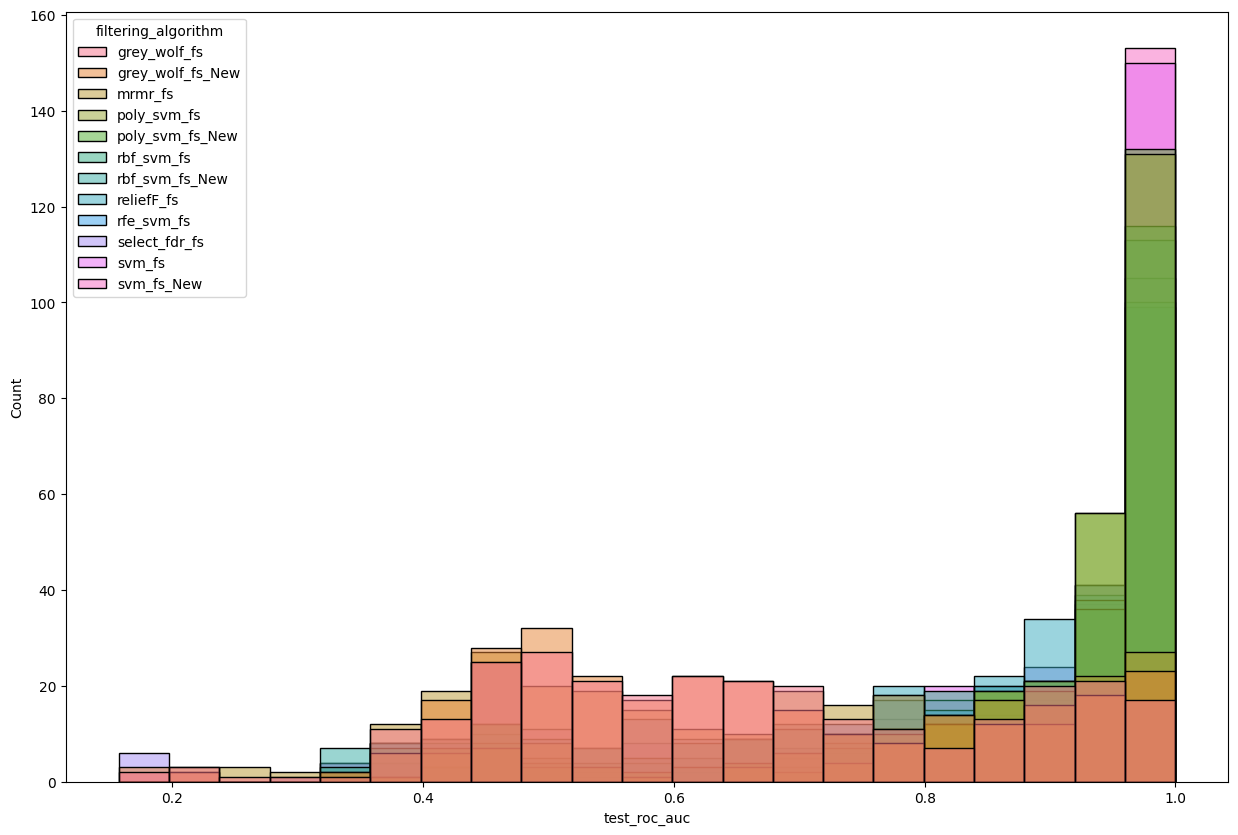

In [128]:
plt.figure(figsize=(15,10))
sns.histplot(data=mean_df, x=metric_col, hue="filtering_algorithm")

# Accuracy

## Best Scores per Dataset

In [129]:
metric_col = 'test_acc'

mean_df = df[~df['filtering_algorithm'].str.endswith('_Aug')].groupby(['dataset', 'filtering_algorithm', 'n_selected_features']).mean()[metric_col].reset_index()

max_df = mean_df.groupby('dataset').max()['test_acc'].reset_index()

max_df = max_df.apply(
    lambda row: mean_df[(mean_df['dataset'] == row['dataset']) & (mean_df[metric_col] == row[metric_col])].iloc[0],
    axis=1)
max_df

,dataset,filtering_algorithm,n_selected_features,test_acc
0,ALL.csv,grey_wolf_fs,4,0.799744
1,ALLAML.csv,rfe_svm_fs,25,1.000000
2,Breast.csv,svm_fs_New,100,0.975258
3,CLL-SUB-111.csv,poly_svm_fs_New,100,0.822121
4,CLL.csv,poly_svm_fs_New,10,1.000000
5,CNS.csv,svm_fs_New,20,0.943333
6,COIL20.csv,svm_fs,100,0.967639
7,Carcinom.csv,reliefF_fs,100,0.893000
8,Lung.csv,svm_fs_New,100,0.942632
9,Lymphoma.csv,rbf_svm_fs_New,100,1.000000


## Worse Scores per Dataset

In [130]:
min_df = mean_df.groupby('dataset').min()[metric_col].reset_index()

min_df = min_df.apply(
    lambda row: mean_df[(mean_df['dataset'] == row['dataset']) & (mean_df[metric_col] == row[metric_col])].iloc[0],
    axis=1)
min_df

,dataset,filtering_algorithm,n_selected_features,test_acc
0,ALL.csv,svm_fs_New,10,0.694103
1,ALLAML.csv,grey_wolf_fs,10,0.544444
2,Breast.csv,grey_wolf_fs_New,25,0.482474
3,CLL-SUB-111.csv,mrmr_fs,1,0.395152
4,CLL.csv,select_fdr_fs,5,0.345455
5,CNS.csv,select_fdr_fs,15,0.506667
6,COIL20.csv,rbf_svm_fs_New,1,0.105833
7,Carcinom.csv,mrmr_fs,1,0.182500
8,Lung.csv,mrmr_fs,1,0.663842
9,Lymphoma.csv,rfe_svm_fs,1,0.645455


## Scores Histograms per Filtering Algorithm

<AxesSubplot:xlabel='test_acc', ylabel='Count'>

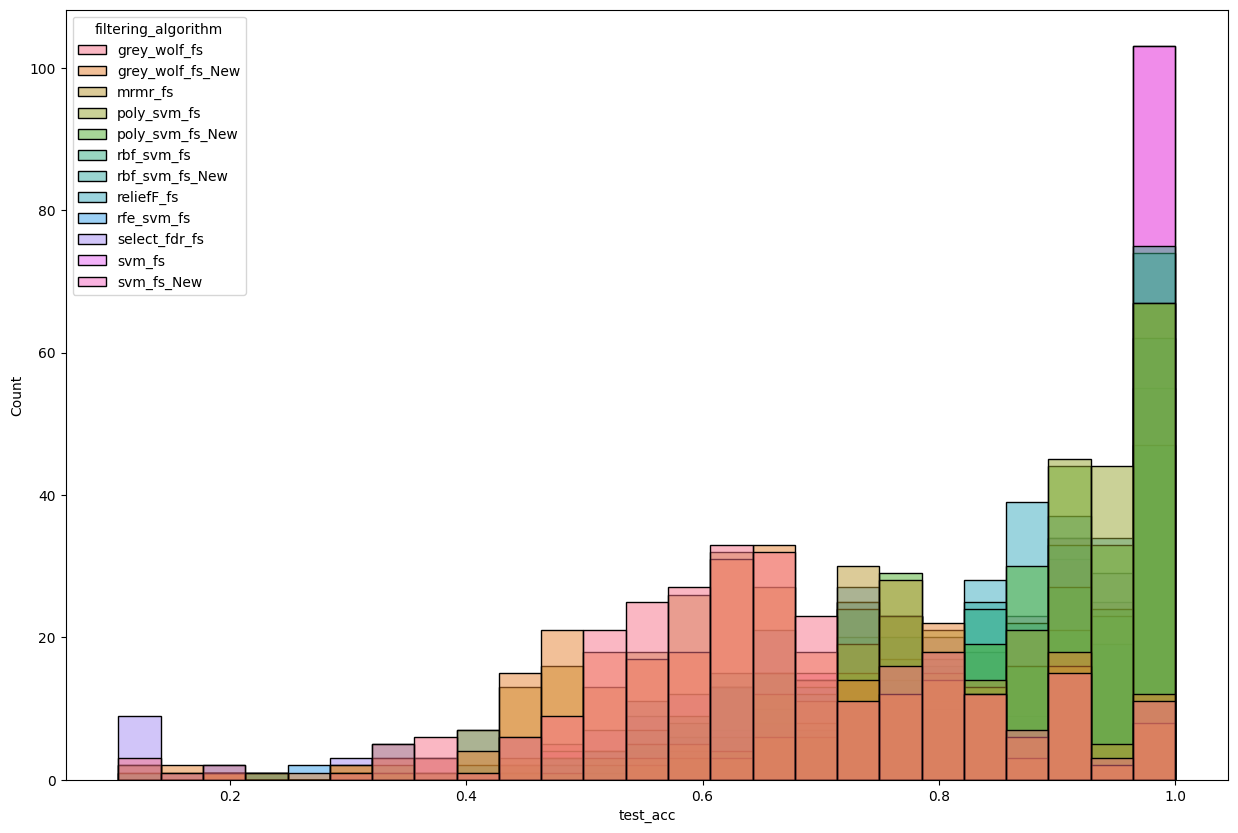

In [131]:
plt.figure(figsize=(15,10))
sns.histplot(data=mean_df, x=metric_col, hue="filtering_algorithm")

# Fit time

## Best Feature-Selection Fit Time per Dataset

In [132]:
metric_col = 'test_feature_selector_fit_time'

mean_df = df[~df['filtering_algorithm'].str.endswith('_Aug')].groupby(['dataset', 'filtering_algorithm']).max()[metric_col].reset_index()

min_df = mean_df.groupby(['dataset']).min()[metric_col].reset_index()

min_df = min_df.apply(lambda row: mean_df[(mean_df['dataset'] == row['dataset'])
                                             & (mean_df[metric_col] == row[metric_col])].iloc[0], axis=1)
min_df

,dataset,filtering_algorithm,test_feature_selector_fit_time
0,ALL.csv,select_fdr_fs,0.154255
1,ALLAML.csv,select_fdr_fs,0.075487
2,Breast.csv,select_fdr_fs,0.189027
3,CLL-SUB-111.csv,select_fdr_fs,0.091319
4,CLL.csv,reliefF_fs,0.037594
5,CNS.csv,select_fdr_fs,0.086190
6,COIL20.csv,select_fdr_fs,0.105482
7,Carcinom.csv,select_fdr_fs,0.147639
8,Lung.csv,select_fdr_fs,0.320681
9,Lymphoma.csv,select_fdr_fs,0.019393


## Worse Feature-Selection Fit Time per Dataset

In [133]:
max_df = mean_df.groupby(['dataset']).max()[metric_col].reset_index()

max_df = max_df.apply(lambda row: mean_df[(mean_df['dataset'] == row['dataset'])
                                             & (mean_df[metric_col] == row[metric_col])].iloc[0], axis=1)
max_df

,dataset,filtering_algorithm,test_feature_selector_fit_time
0,ALL.csv,grey_wolf_fs_New,9969.911747
1,ALLAML.csv,grey_wolf_fs,2578.123926
2,Breast.csv,grey_wolf_fs,28632.146809
3,CLL-SUB-111.csv,grey_wolf_fs_New,8424.750427
4,CLL.csv,grey_wolf_fs_New,2503.623652
5,CNS.csv,grey_wolf_fs,1446.439229
6,COIL20.csv,grey_wolf_fs_New,4752.545887
7,Carcinom.csv,grey_wolf_fs_New,4215.350222
8,Lung.csv,poly_svm_fs,16031.182596
9,Lymphoma.csv,grey_wolf_fs,580.490254


## Feature-Selection Fit Time Histograms

<AxesSubplot:xlabel='test_feature_selector_fit_time', ylabel='Count'>

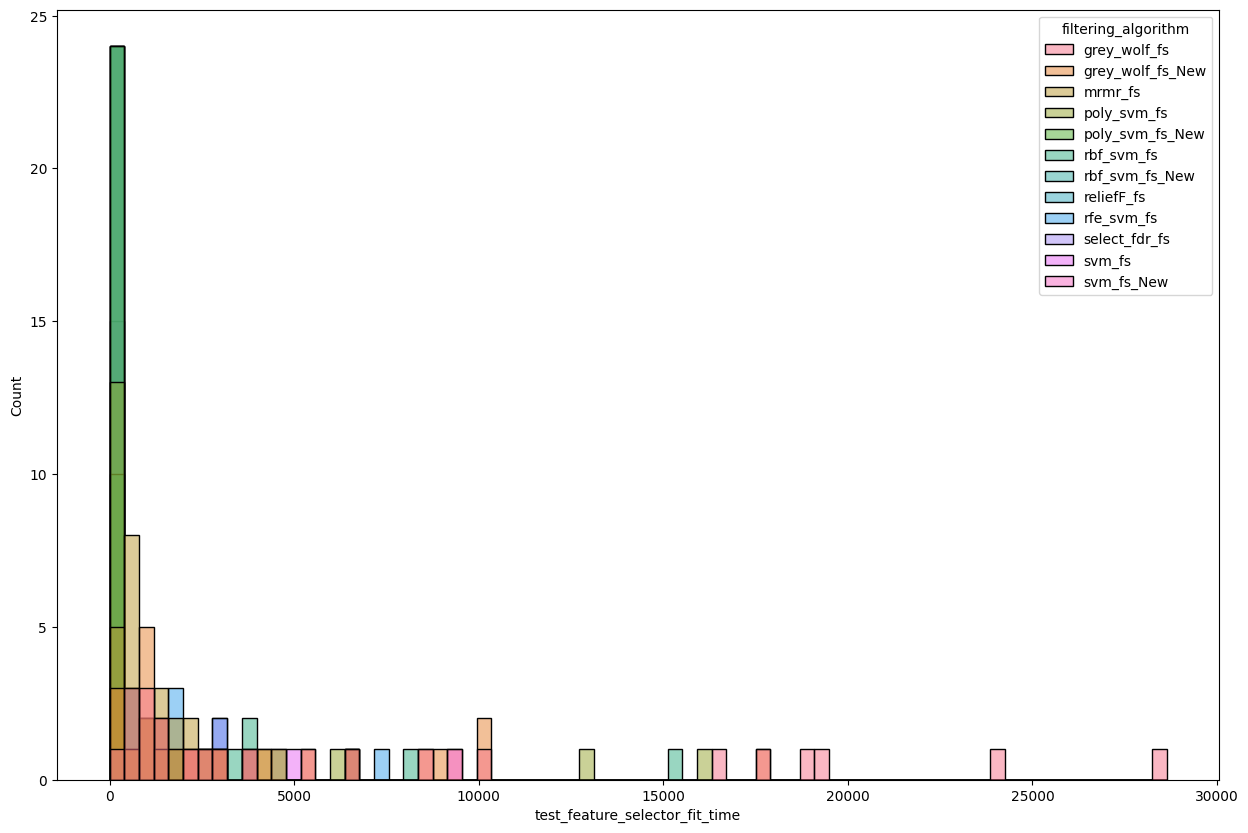

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.histplot(data=mean_df, x=metric_col, hue="filtering_algorithm")

# Compare Original and Improved Versions

## ROC_AUC

In [135]:
metric_col = 'test_roc_auc'

res = {d: {} for d in df.dataset.unique()}
improvements_fs = list(df['filtering_algorithm'][df['filtering_algorithm'].str.endswith('_New')].unique())
for new_fs in improvements_fs:
    org_fs = new_fs[:-len('_New')]
    mean_df = df[df['filtering_algorithm'].isin([org_fs,new_fs])].groupby(['dataset', 'filtering_algorithm']).mean()[metric_col].reset_index()
    for dataset in mean_df.dataset.unique():
        ds_df = mean_df[mean_df['dataset'] == dataset]
        org_metric = ds_df[ds_df['filtering_algorithm'] == org_fs][metric_col].iloc[0]
        new_metric = ds_df[ds_df['filtering_algorithm'] == new_fs][metric_col].iloc[0]
        if new_metric > org_metric:
            res[dataset].update({f'better_{org_fs}': 'Improved', f'better_{org_fs}_percentage': 100 * (new_metric / org_metric - 1)})
        elif new_metric < org_metric:
            res[dataset].update({f'better_{org_fs}': 'Original', f'better_{org_fs}_percentage': 100 * (org_metric / new_metric - 1)})
        else:
            res[dataset].update({f'better_{org_fs}': 'Equal'})
res_df = pd.DataFrame([{'dataset': d, **v} for d, v in res.items()])
res_df

,dataset,better_grey_wolf_fs,better_grey_wolf_fs_percentage,better_poly_svm_fs,better_poly_svm_fs_percentage,better_rbf_svm_fs,better_rbf_svm_fs_percentage,better_svm_fs,better_svm_fs_percentage
0,ALLAML.csv,Original,0.946293,Improved,0.129519,Improved,1.281910,Original,0.326292
1,ALL.csv,Original,0.576087,Original,5.061324,Original,7.054933,Improved,0.384301
2,ayeastCC.csv,Original,0.103563,Equal,NaN,Original,0.040553,Equal,NaN
3,bcellViper.csv,Improved,0.090521,Original,0.561794,Improved,0.682831,Original,0.382225
4,bladderbatch.csv,Improved,3.106280,Original,1.180661,Original,1.734013,Original,0.518755
5,Breast.csv,Original,7.122166,Original,1.897973,Original,0.676380,Improved,1.230627
6,CLL.csv,Original,1.537335,Original,1.954472,Improved,0.083365,Improved,0.271207
7,CLL-SUB-111.csv,Original,6.885843,Improved,0.365855,Improved,0.314381,Original,4.874787
8,CNS.csv,Improved,10.584048,Improved,1.756536,Original,0.450974,Improved,1.694739
9,COIL20.csv,Improved,0.077716,Original,0.167788,Improved,0.538750,Improved,0.540811


In [136]:
stats = []
for new_fs in improvements_fs:
    org_fs = new_fs[:-len('_New')]
    improved = res_df[res_df[f'better_{org_fs}'] == 'Improved']
    not_improved = res_df[res_df[f'better_{org_fs}'] == 'Original']
    frac_improved = len(improved) / len(res_df)
    mean_improved = improved[f'better_{org_fs}_percentage'].mean()
    mean_not_improved = not_improved[f'better_{org_fs}_percentage'].mean()
    stats.append({'filtering_algorithm': org_fs, 'improved_fraction': frac_improved, 'improved_mean_percentage': mean_improved, 'not_improved_mean_percentage': mean_not_improved})
roc_auc_stats_df = pd.DataFrame(stats)
roc_auc_stats_df

,filtering_algorithm,improved_fraction,improved_mean_percentage,not_improved_mean_percentage
0,grey_wolf_fs,0.375000,6.548547,4.365784
1,poly_svm_fs,0.458333,0.501516,1.383476
2,rbf_svm_fs,0.500000,0.527429,1.735725
3,svm_fs,0.458333,0.760632,1.644725


## Accuracy

In [137]:
metric_col = 'test_acc'

res = {d: {} for d in df.dataset.unique()}
improvements_fs = list(df['filtering_algorithm'][df['filtering_algorithm'].str.endswith('_New')].unique())
for new_fs in improvements_fs:
    org_fs = new_fs[:-len('_New')]
    mean_df = df[df['filtering_algorithm'].isin([org_fs,new_fs])].groupby(['dataset', 'filtering_algorithm']).mean()[metric_col].reset_index()
    for dataset in mean_df.dataset.unique():
        ds_df = mean_df[mean_df['dataset'] == dataset]
        org_metric = ds_df[ds_df['filtering_algorithm'] == org_fs][metric_col].iloc[0]
        new_metric = ds_df[ds_df['filtering_algorithm'] == new_fs][metric_col].iloc[0]
        if new_metric > org_metric:
            res[dataset].update({f'better_{org_fs}': 'Improved', f'better_{org_fs}_percentage': 100 * (new_metric / org_metric - 1)})
        elif new_metric < org_metric:
            res[dataset].update({f'better_{org_fs}': 'Original', f'better_{org_fs}_percentage': 100 * (org_metric / new_metric - 1)})
        else:
            res[dataset].update({f'better_{org_fs}': 'Equal'})
res_df = pd.DataFrame([{'dataset': d, **v} for d, v in res.items()])
res_df

,dataset,better_grey_wolf_fs,better_grey_wolf_fs_percentage,better_poly_svm_fs,better_poly_svm_fs_percentage,better_rbf_svm_fs,better_rbf_svm_fs_percentage,better_svm_fs,better_svm_fs_percentage
0,ALLAML.csv,Improved,1.966874,Improved,0.023810,Improved,2.539448,Original,0.662565
1,ALL.csv,Improved,0.173183,Original,0.902310,Original,0.998059,Original,1.310319
2,ayeastCC.csv,Improved,1.321928,Equal,NaN,Improved,0.170416,Equal,NaN
3,bcellViper.csv,Improved,0.799619,Original,1.026795,Improved,0.232158,Original,0.689465
4,bladderbatch.csv,Improved,2.373129,Original,4.975288,Original,2.500000,Improved,1.061174
5,Breast.csv,Original,3.280225,Original,0.467955,Original,1.593049,Improved,1.765873
6,CLL.csv,Improved,1.440922,Original,1.357827,Original,0.789266,Improved,0.077882
7,CLL-SUB-111.csv,Original,7.454214,Improved,0.084163,Improved,0.050495,Original,6.540544
8,CNS.csv,Improved,3.315714,Improved,0.547383,Improved,0.482375,Improved,2.595269
9,COIL20.csv,Original,2.077392,Original,1.090964,Original,0.014127,Improved,1.682926


In [138]:
stats = []
for new_fs in improvements_fs:
    org_fs = new_fs[:-len('_New')]
    improved = res_df[res_df[f'better_{org_fs}'] == 'Improved']
    not_improved = res_df[res_df[f'better_{org_fs}'] == 'Original']
    frac_improved = len(improved) / len(res_df)
    mean_improved = improved[f'better_{org_fs}_percentage'].mean()
    mean_not_improved = not_improved[f'better_{org_fs}_percentage'].mean()
    stats.append({'filtering_algorithm': org_fs, 'improved_fraction': frac_improved, 'improved_mean_percentage': mean_improved, 'not_improved_mean_percentage': mean_not_improved})
acc_stats_df = pd.DataFrame(stats)
acc_stats_df

,filtering_algorithm,improved_fraction,improved_mean_percentage,not_improved_mean_percentage
0,grey_wolf_fs,0.541667,1.918962,3.931041
1,poly_svm_fs,0.541667,0.526080,1.315411
2,rbf_svm_fs,0.416667,0.725618,1.189545
3,svm_fs,0.500000,1.076603,1.716582


# Fit time

In [141]:
metric_col = 'test_feature_selector_fit_time'

res = {d: {} for d in df.dataset.unique()}
improvements_fs = list(df['filtering_algorithm'][df['filtering_algorithm'].str.endswith('_New')].unique())
for new_fs in improvements_fs:
    org_fs = new_fs[:-len('_New')]
    mean_df = df[df['filtering_algorithm'].isin([org_fs,new_fs])].groupby(['dataset', 'filtering_algorithm']).max()[metric_col].reset_index()
    for dataset in mean_df.dataset.unique():
        ds_df = mean_df[mean_df['dataset'] == dataset]
        org_metric = ds_df[ds_df['filtering_algorithm'] == org_fs][metric_col].iloc[0]
        new_metric = ds_df[ds_df['filtering_algorithm'] == new_fs][metric_col].iloc[0]
        if new_metric < org_metric:
            res[dataset].update({f'better_{org_fs}': 'Improved', f'better_{org_fs}_percentage': 100 * (1 - new_metric / org_metric)})
        elif new_metric > org_metric:
            res[dataset].update({f'better_{org_fs}': 'Original', f'better_{org_fs}_percentage': 100 * (1 - org_metric / new_metric)})
        else:
            res[dataset].update({f'better_{org_fs}': 'Equal'})
res_df = pd.DataFrame([{'dataset': d, **v} for d, v in res.items()])
res_df

,dataset,better_grey_wolf_fs,better_grey_wolf_fs_percentage,better_poly_svm_fs,better_poly_svm_fs_percentage,better_rbf_svm_fs,better_rbf_svm_fs_percentage,better_svm_fs,better_svm_fs_percentage
0,ALLAML.csv,Improved,15.164895,Improved,99.809068,Improved,99.810553,Improved,99.770364
1,ALL.csv,Original,34.436158,Improved,99.969945,Improved,99.866910,Improved,99.864731
2,ayeastCC.csv,Original,37.892492,Improved,99.363202,Improved,99.490962,Improved,96.809083
3,bcellViper.csv,Improved,9.016562,Improved,99.836126,Improved,99.851095,Improved,99.731192
4,bladderbatch.csv,Improved,38.928728,Improved,99.954906,Improved,99.934598,Improved,99.936092
5,Breast.csv,Improved,38.713405,Improved,99.942971,Improved,99.955716,Improved,99.919753
6,CLL.csv,Original,7.390204,Improved,99.150607,Improved,99.326679,Improved,98.863130
7,CLL-SUB-111.csv,Original,0.378930,Improved,99.938270,Improved,99.892423,Improved,99.911170
8,CNS.csv,Improved,41.641027,Improved,99.732202,Improved,99.736990,Improved,99.623953
9,COIL20.csv,Original,80.587979,Improved,97.286345,Improved,98.991579,Improved,98.616409


In [142]:
stats = []
for new_fs in improvements_fs:
    org_fs = new_fs[:-len('_New')]
    improved = res_df[res_df[f'better_{org_fs}'] == 'Improved']
    not_improved = res_df[res_df[f'better_{org_fs}'] == 'Original']
    frac_improved = len(improved) / len(res_df)
    mean_improved = improved[f'better_{org_fs}_percentage'].mean()
    mean_not_improved = not_improved[f'better_{org_fs}_percentage'].mean()
    stats.append({'filtering_algorithm': org_fs, 'improved_fraction': frac_improved, 'improved_mean_percentage': mean_improved, 'not_improved_mean_percentage': mean_not_improved})
fit_time_stats_df = pd.DataFrame(stats)
fit_time_stats_df

,filtering_algorithm,improved_fraction,improved_mean_percentage,not_improved_mean_percentage
0,grey_wolf_fs,0.583333,53.658517,32.785015
1,poly_svm_fs,1.000000,98.907902,NaN
2,rbf_svm_fs,1.000000,99.058925,NaN
3,svm_fs,1.000000,98.479081,NaN


## Comparison Summary

In [143]:
roc_auc_stats_df['metric'] = 'roc_auc'
acc_stats_df['metric'] = 'accuracy'
fit_time_stats_df['metric'] = 'fit_time'
stats_df = pd.concat([roc_auc_stats_df, acc_stats_df, fit_time_stats_df])
stats_df

,filtering_algorithm,improved_fraction,improved_mean_percentage,not_improved_mean_percentage,metric
0,grey_wolf_fs,0.375000,6.548547,4.365784,roc_auc
1,poly_svm_fs,0.458333,0.501516,1.383476,roc_auc
2,rbf_svm_fs,0.500000,0.527429,1.735725,roc_auc
3,svm_fs,0.458333,0.760632,1.644725,roc_auc
0,grey_wolf_fs,0.541667,1.918962,3.931041,accuracy
1,poly_svm_fs,0.541667,0.526080,1.315411,accuracy
2,rbf_svm_fs,0.416667,0.725618,1.189545,accuracy
3,svm_fs,0.500000,1.076603,1.716582,accuracy
0,grey_wolf_fs,0.583333,53.658517,32.785015,fit_time
1,poly_svm_fs,1.000000,98.907902,NaN,fit_time


# Augmentation

# ROC_AUC

In [152]:
metric_col = 'test_roc_auc'

lst = []
improvements_fs = list(df['filtering_algorithm'][df['filtering_algorithm'].str.endswith('_Aug')].unique())
for new_fs in improvements_fs:
    org_fs = new_fs[:-len('_Aug')]
    mean_df = df[df['filtering_algorithm'].isin([org_fs,new_fs])].groupby(['dataset', 'filtering_algorithm']).mean()[metric_col].reset_index()
    for dataset in mean_df[mean_df['filtering_algorithm'] == new_fs].dataset.unique():
        ds_df = mean_df[mean_df['dataset'] == dataset]
        org_metric = ds_df[ds_df['filtering_algorithm'] == org_fs][metric_col].iloc[0]
        new_metric = ds_df[ds_df['filtering_algorithm'] == new_fs][metric_col].iloc[0]
        if new_metric > org_metric:
            lst.append({'dataset': dataset, 'feature_selector': org_fs, f'better_mode': 'Augmented', f'percentage': 100 * (new_metric / org_metric - 1)})
        elif new_metric < org_metric:
            lst.append({'dataset': dataset, 'feature_selector': org_fs, f'better_mode': 'Original', f'percentage': 100 * (org_metric / new_metric - 1)})
        else:
            lst.append({'dataset': dataset, 'feature_selector': org_fs, f'better_mode': 'Equal'})
res_df = pd.DataFrame(lst)
res_df

,dataset,feature_selector,better_mode,percentage
0,CLL-SUB-111.csv,poly_svm_fs_New,Augmented,14.735752
1,golub_inputs.csv,poly_svm_fs_New,Augmented,0.860533
2,Lymphoma.csv,rbf_svm_fs,Augmented,2.383541
3,MLL.csv,rbf_svm_fs,Augmented,5.018475
4,bladderbatch.csv,rbf_svm_fs,Augmented,0.755721
5,ALLAML.csv,poly_svm_fs,Augmented,0.895898
6,CLL.csv,poly_svm_fs,Augmented,1.037438
7,borovecki_inputs.csv,poly_svm_fs,Augmented,0.122699
8,subramanian_inputs.csv,poly_svm_fs,Augmented,5.736854
9,west_inputs.csv,poly_svm_fs,Augmented,4.307010


In [153]:
stats = []
improved = res_df[res_df[f'better_mode'] == 'Augmented']
not_improved = res_df[res_df[f'better_mode'] == 'Original']
frac_improved = len(improved) / len(res_df)
mean_improved = improved['percentage'].mean()
mean_not_improved = not_improved['percentage'].mean()
stats.append({'improved_fraction': frac_improved, 'improved_mean_percentage': mean_improved, 'not_improved_mean_percentage': mean_not_improved})
roc_auc_stats_df = pd.DataFrame(stats)
roc_auc_stats_df

,improved_fraction,improved_mean_percentage,not_improved_mean_percentage
0,0.916667,9.546798,33.859353


## Accuracy

In [154]:
metric_col = 'test_acc'

lst = []
improvements_fs = list(df['filtering_algorithm'][df['filtering_algorithm'].str.endswith('_Aug')].unique())
for new_fs in improvements_fs:
    org_fs = new_fs[:-len('_Aug')]
    mean_df = df[df['filtering_algorithm'].isin([org_fs,new_fs])].groupby(['dataset', 'filtering_algorithm']).mean()[metric_col].reset_index()
    for dataset in mean_df[mean_df['filtering_algorithm'] == new_fs].dataset.unique():
        ds_df = mean_df[mean_df['dataset'] == dataset]
        org_metric = ds_df[ds_df['filtering_algorithm'] == org_fs][metric_col].iloc[0]
        new_metric = ds_df[ds_df['filtering_algorithm'] == new_fs][metric_col].iloc[0]
        if new_metric > org_metric:
            lst.append({'dataset': dataset, 'feature_selector': org_fs, f'better_mode': 'Augmented', f'percentage': 100 * (new_metric / org_metric - 1)})
        elif new_metric < org_metric:
            lst.append({'dataset': dataset, 'feature_selector': org_fs, f'better_mode': 'Original', f'percentage': 100 * (org_metric / new_metric - 1)})
        else:
            lst.append({'dataset': dataset, 'feature_selector': org_fs, f'better_mode': 'Equal'})
res_df = pd.DataFrame(lst)
res_df

,dataset,feature_selector,better_mode,percentage
0,CLL-SUB-111.csv,poly_svm_fs_New,Augmented,16.262010
1,golub_inputs.csv,poly_svm_fs_New,Augmented,2.539758
2,Lymphoma.csv,rbf_svm_fs,Augmented,7.346164
3,MLL.csv,rbf_svm_fs,Augmented,13.534823
4,bladderbatch.csv,rbf_svm_fs,Augmented,1.925185
5,ALLAML.csv,poly_svm_fs,Augmented,2.857143
6,CLL.csv,poly_svm_fs,Original,5.750000
7,borovecki_inputs.csv,poly_svm_fs,Augmented,0.431965
8,subramanian_inputs.csv,poly_svm_fs,Augmented,7.338445
9,west_inputs.csv,poly_svm_fs,Augmented,7.708411


In [155]:
stats = []
improved = res_df[res_df[f'better_mode'] == 'Augmented']
not_improved = res_df[res_df[f'better_mode'] == 'Original']
frac_improved = len(improved) / len(res_df)
mean_improved = improved['percentage'].mean()
mean_not_improved = not_improved['percentage'].mean()
stats.append({'improved_fraction': frac_improved, 'improved_mean_percentage': mean_improved, 'not_improved_mean_percentage': mean_not_improved})
acc_stats_df = pd.DataFrame(stats)
acc_stats_df

,improved_fraction,improved_mean_percentage,not_improved_mean_percentage
0,0.833333,17.739158,6.70415


## Fit Time

In [156]:
metric_col = 'test_classifier_fit_time'

lst = []
improvements_fs = list(df['filtering_algorithm'][df['filtering_algorithm'].str.endswith('_Aug')].unique())
for new_fs in improvements_fs:
    org_fs = new_fs[:-len('_Aug')]
    mean_df = df[df['filtering_algorithm'].isin([org_fs,new_fs])].groupby(['dataset', 'filtering_algorithm']).max()[metric_col].reset_index()
    for dataset in mean_df[mean_df['filtering_algorithm'] == new_fs].dataset.unique():
        ds_df = mean_df[mean_df['dataset'] == dataset]
        org_metric = ds_df[ds_df['filtering_algorithm'] == org_fs][metric_col].iloc[0]
        new_metric = ds_df[ds_df['filtering_algorithm'] == new_fs][metric_col].iloc[0]
        if new_metric < org_metric:
            lst.append({'dataset': dataset, 'feature_selector': org_fs, f'better_mode': 'Augmented', f'percentage': 100 * (1 - new_metric / org_metric)})
        elif new_metric > org_metric:
            lst.append({'dataset': dataset, 'feature_selector': org_fs, f'better_mode': 'Original', f'percentage': 100 * (1 - org_metric / new_metric)})
        else:
            lst.append({'dataset': dataset, 'feature_selector': org_fs, f'better_mode': 'Equal'})
res_df = pd.DataFrame(lst)
res_df

,dataset,feature_selector,better_mode,percentage
0,CLL-SUB-111.csv,poly_svm_fs_New,Augmented,60.706160
1,golub_inputs.csv,poly_svm_fs_New,Augmented,99.882568
2,Lymphoma.csv,rbf_svm_fs,Augmented,99.351268
3,MLL.csv,rbf_svm_fs,Augmented,99.889970
4,bladderbatch.csv,rbf_svm_fs,Augmented,99.819029
5,ALLAML.csv,poly_svm_fs,Augmented,99.565865
6,CLL.csv,poly_svm_fs,Augmented,99.330862
7,borovecki_inputs.csv,poly_svm_fs,Augmented,99.927905
8,subramanian_inputs.csv,poly_svm_fs,Augmented,99.940445
9,west_inputs.csv,poly_svm_fs,Augmented,99.963758


In [157]:
stats = []
improved = res_df[res_df[f'better_mode'] == 'Augmented']
not_improved = res_df[res_df[f'better_mode'] == 'Original']
frac_improved = len(improved) / len(res_df)
mean_improved = improved['percentage'].mean()
mean_not_improved = not_improved['percentage'].mean()
stats.append({'improved_fraction': frac_improved, 'improved_mean_percentage': mean_improved, 'not_improved_mean_percentage': mean_not_improved})
fit_time_stats_df = pd.DataFrame(stats)
fit_time_stats_df

,improved_fraction,improved_mean_percentage,not_improved_mean_percentage
0,0.916667,89.941047,27.917744


## Comparison Summary

In [158]:
roc_auc_stats_df['metric'] = 'roc_auc'
acc_stats_df['metric'] = 'accuracy'
fit_time_stats_df['metric'] = 'fit_time'
stats_df = pd.concat([roc_auc_stats_df, acc_stats_df, fit_time_stats_df])
stats_df

,improved_fraction,improved_mean_percentage,not_improved_mean_percentage,metric
0,0.916667,9.546798,33.859353,roc_auc
0,0.833333,17.739158,6.704150,accuracy
0,0.916667,89.941047,27.917744,fit_time


# Friedman PostHoc Test

rejected null hypothesis
algorithm poly_svm_fs is significantly better than algorithms {'select_fdr_fs', 'reliefF_fs', 'svm_fs_New', 'svm_fs', 'mrmr_fs', 'rbf_svm_fs_New', 'grey_wolf_fs', 'grey_wolf_fs_New', 'rfe_svm_fs', 'rbf_svm_fs'} in terms of test_roc_auc
algorithm poly_svm_fs_New is significantly better than algorithms {'select_fdr_fs', 'reliefF_fs', 'svm_fs_New', 'svm_fs', 'mrmr_fs', 'rbf_svm_fs_New', 'grey_wolf_fs', 'grey_wolf_fs_New', 'rfe_svm_fs', 'rbf_svm_fs'} in terms of test_roc_auc
algorithm rbf_svm_fs is significantly better than algorithms {'mrmr_fs', 'grey_wolf_fs', 'grey_wolf_fs_New'} in terms of test_roc_auc
algorithm rbf_svm_fs_New is significantly better than algorithms {'mrmr_fs', 'grey_wolf_fs', 'grey_wolf_fs_New'} in terms of test_roc_auc
algorithm reliefF_fs is significantly better than algorithms {'mrmr_fs', 'grey_wolf_fs', 'grey_wolf_fs_New', 'rfe_svm_fs'} in terms of test_roc_auc
algorithm rfe_svm_fs is significantly better than algorithms {'mrmr_fs', 'grey_

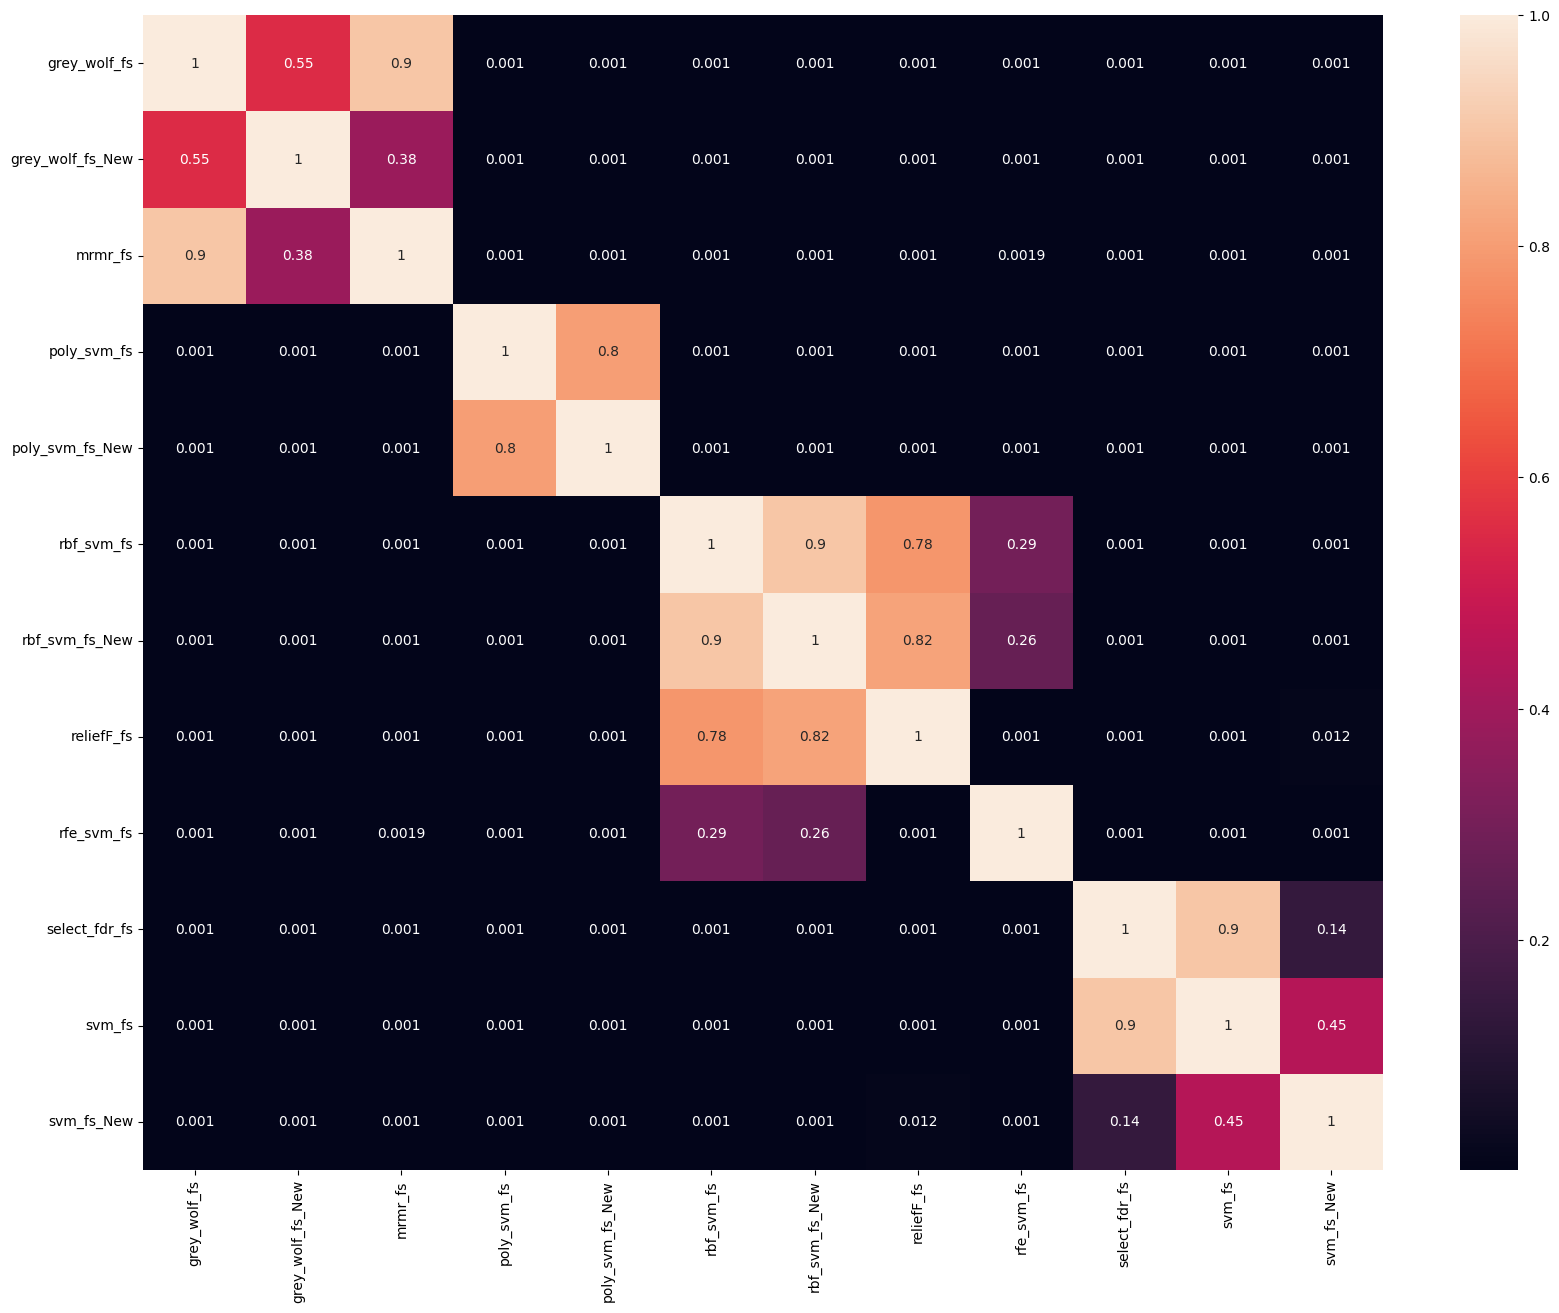

In [151]:
from friedman_posthoc_test import friedman_posthoc_test
friedman_posthoc_test(df[~df['filtering_algorithm'].str.endswith('_Aug')])